[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Princ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


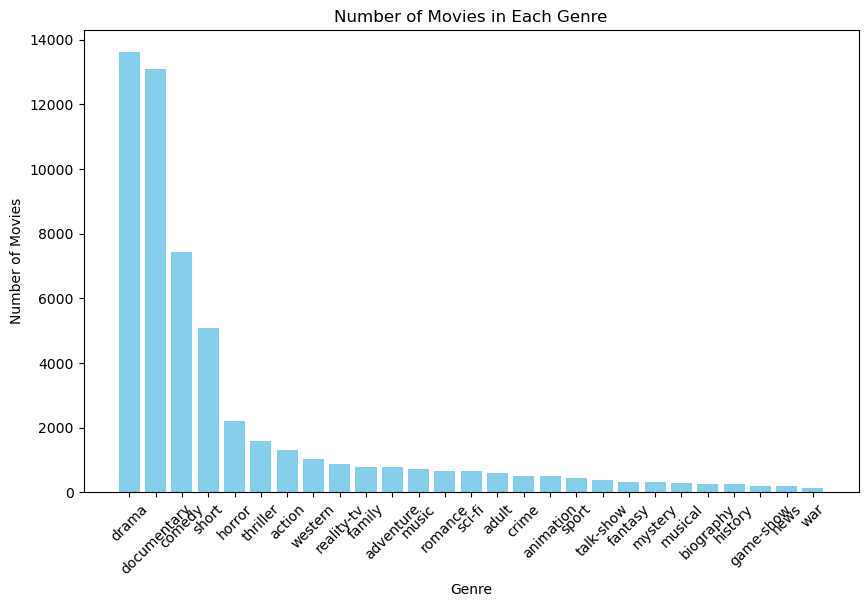

          ID                           TITLE  \
0          1            Edgar's Lunch (1998)   
1          2        La guerra de papá (1977)   
2          3     Off the Beaten Track (2010)   
3          4          Meu Amigo Hindu (2015)   
4          5               Er nu zhai (1955)   
...      ...                             ...   
54195  54196  "Tales of Light & Dark" (2013)   
54196  54197     Der letzte Mohikaner (1965)   
54197  54198             Oliver Twink (2007)   
54198  54199               Slipstream (1973)   
54199  54200       Curitiba Zero Grau (2010)   

                                             DESCRIPTION  
0      lr brane loves life car apartment job especial...  
1      spain march quico naughty child three belongin...  
2      one year life albin family shepherds north tra...  
3      father died hasnt spoken brother years serious...  
4      known internationally martial arts superstar b...  
...                                                  ...  
54195  cov

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import nltk

nltk.download('stopwords')


def read_train_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ::: ')
            if len(parts) == 4:
                data.append(parts)
    return pd.DataFrame(data, columns=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


def read_test_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ::: ')
            if len(parts) == 3:
                data.append(parts)
    return pd.DataFrame(data, columns=['ID', 'TITLE', 'DESCRIPTION'])


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


train_data = read_train_data('train_data.txt')
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(preprocess_text)

# Plotting the number of movies in each genre
genre_counts = train_data['GENRE'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.xticks(rotation=45)
plt.show()

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data['DESCRIPTION'])
y_train = train_data['GENRE']

logreg = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
svc = SVC(kernel='linear')

logreg.fit(X_train_tfidf, y_train)
nb.fit(X_train_tfidf, y_train)
svc.fit(X_train_tfidf, y_train)

test_data = read_test_data('test_data.txt')
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].apply(preprocess_text)
X_test_tfidf = vectorizer.transform(test_data['DESCRIPTION'])

logreg_predictions = logreg.predict(X_test_tfidf)
nb_predictions = nb.predict(X_test_tfidf)
svc_predictions = svc.predict(X_test_tfidf)

output_file_path = 'test_predictions.txt'
with open(output_file_path, 'w', encoding='utf-8') as f:
    for i in range(len(test_data)):
        f.write(
            f"ID: {test_data.iloc[i]['ID']} ::: TITLE: {test_data.iloc[i]['TITLE']} ::: LOGREG_PREDICTION: {logreg_predictions[i]} ::: NB_PREDICTION: {nb_predictions[i]} ::: SVC_PREDICTION: {svc_predictions[i]}\n")

print(test_data[['ID', 'TITLE', 'DESCRIPTION']])
print("Predictions saved to", output_file_path)
